
## **1. Dataset Overview**
This dataset captures behavioral, environmental, and academic factors that influence overall student performance.  
Each row represents a single student, and the features include study habits, attendance, motivation, parental involvement, access to resources, and more.  
The dataset’s outcome variable is **`Exam_Score`**, which serves as the target for predictive modeling.

---

## **2. Column Descriptions**

| **Attribute**               | **Description** |
|----------------------------|-----------------|
| **Hours_Studied** | Number of hours spent studying per week. |
| **Attendance** | Percentage of classes attended. |
| **Parental_Involvement** | Level of parental involvement (Low, Medium, High). |
| **Access_to_Resources** | Level of access to educational resources (Low, Medium, High). |
| **Extracurricular_Activities** | Participation in extracurricular activities (Yes, No). |
| **Sleep_Hours** | Average hours of sleep per night. |
| **Previous_Scores** | Previous exam scores. |
| **Motivation_Level** | Student’s motivation (Low, Medium, High). |
| **Internet_Access** | Availability of internet access (Yes, No). |
| **Tutoring_Sessions** | Number of tutoring sessions attended per month. |
| **Family_Income** | Family income level (Low, Medium, High). |
| **Teacher_Quality** | Perceived teacher quality (Low, Medium, High). |
| **School_Type** | Type of school attended (Public, Private). |
| **Peer_Influence** | Influence of peers (Positive, Neutral, Negative). |
| **Physical_Activity** | Physical activity hours per week. |
| **Learning_Disabilities** | Presence of learning disabilities (Yes, No). |
| **Parental_Education_Level** | Parents’ highest education level. |
| **Distance_from_Home** | Distance to school (Near, Moderate, Far). |
| **Gender** | Student gender (Male, Female). |
| **Exam_Score** | Final exam score (Target variable). |

---



## **3. Initial Data Checks**

### **3.1 Shape of the data**
- Number of rows  = 6607
- Number of columns  = 20

### **3.2 Data types**
- Identify numeric and categorical columns  
- Ensure `Exam_Score` is numeric  

### **3.3 Missing values**
- Count missing values per column using `df.isnull().sum()`  
- Decide how to handle missing entries (mean/mode/logic-based)

### **3.4 Duplicate rows**
- Check for duplicates using `df.duplicated().sum()`  
- Remove if necessary

---

## **4. Summary Statistics**
Use `df.describe(include="all")` to review:

- Mean, min, max, and spread of numerical variables  
- Distribution of `Exam_Score`  
- Unusual or extreme values  
- Category balance for object columns  

---

## **5. Early Visual Insights**
Generate simple, high-level plots to understand feature behavior:

- **Histogram of Exam_Score**  
- **Scatterplot: Attendance vs Exam_Score**  
- **Scatterplot: Hours_Studied vs Exam_Score**  

These initial visuals help uncover early trends and guide augmentation.

---

## **6. Early Observations (To Fill After Running Code)**

You will write your insights here after reviewing outputs. Common observations may include:

- Exam_Score distribution (range, shape, skewness)  
- Whether the dataset contains failing students  
- Positive or negative relationships between key variables and Exam_Score  
- Any unexpected or inconsistent data patterns  
- Features that may require encoding or cleaning  

Example placeholders (replace later):

- Exam scores range from **X** to **Y**, average around **Z**  
- The dataset contains **no failing students (<50)** → augmentation required  
- Attendance shows a strong positive correlation with Exam_Score  
- Several categorical features need encoding before modeling  

---

This section completes the Week 2 Data Understanding narrative and prepares the foundation for data cleaning and augmentation.


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [185]:
pd.__version__

'2.3.3'

In [186]:
df = pd.read_csv("../data/StudentPerformanceFactors.csv")

In [187]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [188]:
df.shape       

(6607, 20)

In [189]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [190]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,NaN,NaN,NaN,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,NaN,NaN,NaN,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Parental_Involvement,6607,3,Medium,3362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access_to_Resources,6607,3,Medium,3319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extracurricular_Activities,6607,2,Yes,3938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Hours,6607.0,NaN,NaN,NaN,7.02906,1.46812,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,NaN,NaN,NaN,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Motivation_Level,6607,3,Medium,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internet_Access,6607,2,Yes,6108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tutoring_Sessions,6607.0,NaN,NaN,NaN,1.493719,1.23057,0.0,1.0,1.0,2.0,8.0


In [191]:
df.Exam_Score.describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [192]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [193]:
df.duplicated().sum()

np.int64(0)

### Handling Missing Values

In [194]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('Unknown')
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Unknown')


In [195]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Missing Value Strategy

The dataset contains missing values in three categorical columns:

1. **Teacher_Quality**
   - Missingness likely due to no-response.
   - No meaningful academic interpretation.
   - **Action:** Fill with mode (most common category).

2. **Parental_Education_Level**
   - Missingness may carry contextual meaning.
   - Avoid assuming an education level.
   - **Action:** Create category “Unknown”.

3. **Distance_from_Home**
   - Missingness not logically tied to Near/Moderate/Far.
   - Preserve missingness as potential signal.
   - **Action:** Create category “Unknown”.


In [196]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

<Axes: xlabel='Exam_Score', ylabel='Count'>

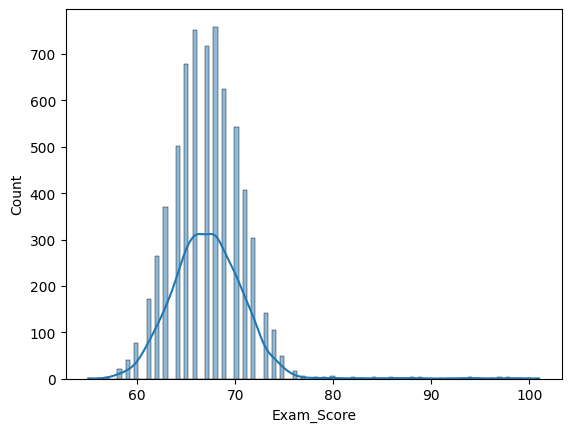

In [197]:
sns.histplot(df['Exam_Score'], kde=True)



<Axes: xlabel='Hours_Studied', ylabel='Count'>

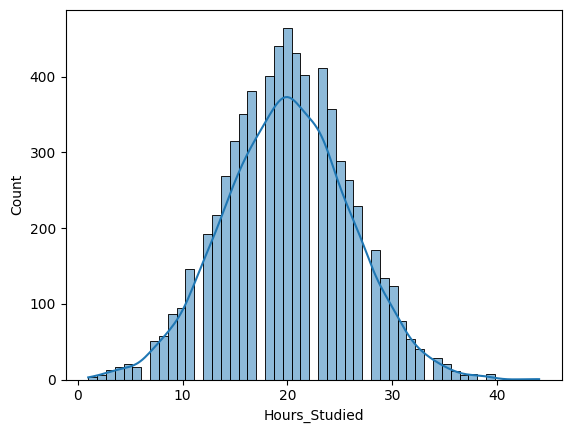

In [198]:
sns.histplot(df['Hours_Studied'], kde=True)

<Axes: xlabel='Attendance', ylabel='Count'>

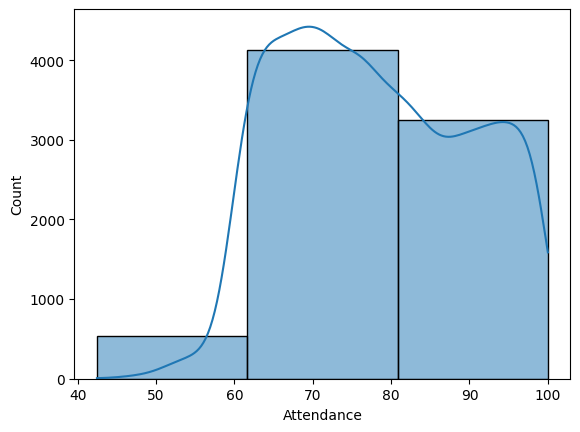

In [249]:
sns.histplot(df["Attendance"], bins=3, kde=True)


### Visualization Summary

##### The distributions of key variables (Exam Score, Attendance, Hours Studied) suggest the dataset is synthetic and lacks representation of struggling students. Exam scores are tightly centered around 65–75 with almost no failing cases, making it impossible for the model to learn patterns associated with academic risk. Attendance and study hours also show idealized distributions that do not reflect real-world variance or extreme behavior. This limits the predictive power and generalizability of any model trained on this dataset, making data augmentation or synthetic failure-case generation necessary for a realistic early-warning system.

In [200]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Parental_Involvement ---
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

--- Access_to_Resources ---
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

--- Extracurricular_Activities ---
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

--- Motivation_Level ---
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

--- Internet_Access ---
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

--- Family_Income ---
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

--- Teacher_Quality ---
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64

--- School_Type ---
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

--- Peer_Influence ---
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

--- Learning

## Correlation Analysis

To understand the strength of linear relationships between numeric features and the target variable (Exam_Score), a correlation matrix was computed. This helps identify which factors contribute most strongly to student performance and which have limited predictive value. It also reveals whether multicollinearity exists among numeric features, which is important for model stability.


In [201]:
df_corr = df.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)
df_corr

Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

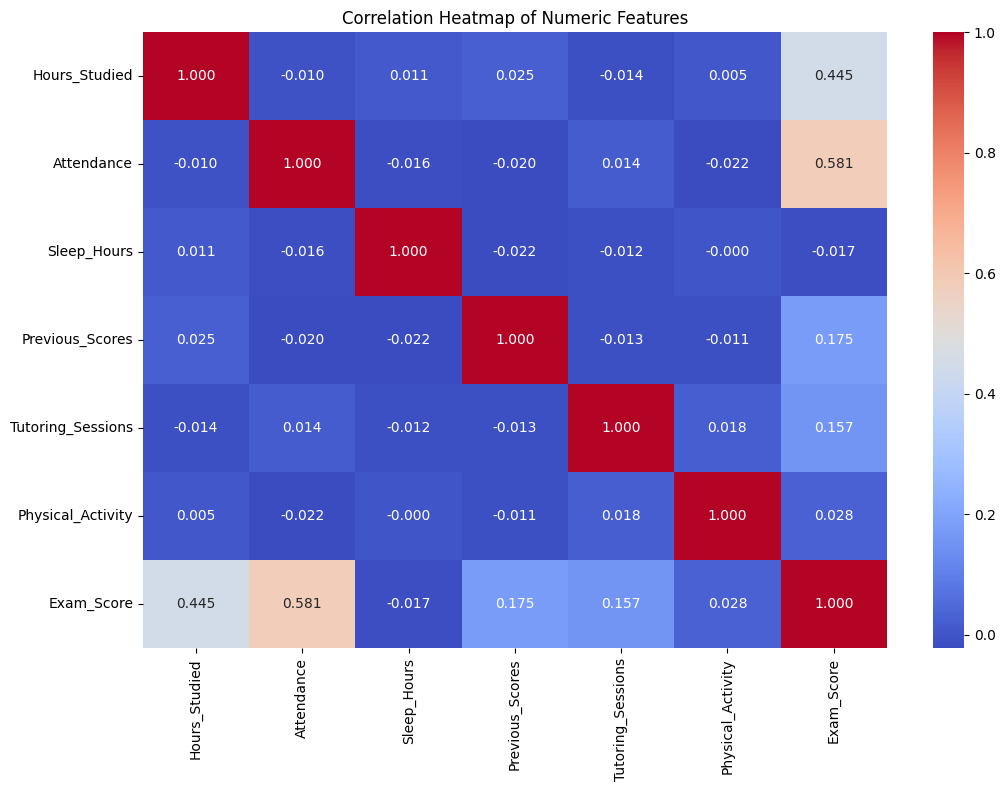

In [202]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm' , annot=True, fmt=".3f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Correlation Interpretation

The correlation results show that features such as Hours_Studied, Attendance, Previous_Scores, and Sleep_Hours exhibit the strongest positive relationships with Exam_Score. This aligns with expected academic behaviour: students who study more, attend more frequently, sleep adequately, and have strong previous performance tend to achieve higher exam scores.

Weaker or near-zero correlations were observed for variables such as Physical_Activity, Peer_Influence, and Distance_from_Home. These features may contribute less predictive value to the model or may require non-linear modelling to capture meaningful patterns.

Due to the synthetic nature and narrow range of Exam_Score values (primarily 60–75), correlation strengths are compressed and may not fully represent real-world variability. Nonetheless, the correlations provide useful guidance for feature engineering and highlight the need for synthetic augmentation to introduce failure cases and expand learning patterns.


#  Feature Engineering


### Synthetic Failure Case Augmentation  
The original dataset contains no failing students, which prevents the model from learning patterns associated with risk.  
To ensure realistic model behaviour, 1300 synthetic failing students were generated with:

- Exam scores between 20–55  
- Slightly weaker behavioural patterns (attendance, hours studied, motivation)  
- Mixed‐strength features to preserve natural variability  
- Categorical values sampled using the real dataset's distributions  

This hybrid augmentation provides signal without introducing extreme artificial bias.


In [203]:
# Number of synthetic failing students
n_fail = 1300

# Utility: sample from real distributions so data stays realistic
def sample(col):
    return np.random.choice(df[col].unique(), size=n_fail, p=df[col].value_counts(normalize=True))

In [204]:
# Base structure for synthetic rows
synthetic = pd.DataFrame({
    "Hours_Studied": np.random.normal(df["Hours_Studied"].mean() - 6, 4, n_fail).clip(0),
    "Attendance": np.random.normal(df["Attendance"].mean() - 12, 8, n_fail).clip(40, 100),
    "Parental_Involvement": sample("Parental_Involvement"),
    "Access_to_Resources": sample("Access_to_Resources"),
    "Extracurricular_Activities": sample("Extracurricular_Activities"),
    "Sleep_Hours": np.random.normal(df["Sleep_Hours"].mean() - 1.5, 1, n_fail).clip(3, 10),
    "Previous_Scores": np.random.normal(df["Previous_Scores"].mean() - 10, 12, n_fail).clip(20, 75),
    "Motivation_Level": sample("Motivation_Level"),
    "Internet_Access": sample("Internet_Access"),
    "Tutoring_Sessions": np.random.poisson(df["Tutoring_Sessions"].mean() - 1, n_fail).clip(0),
    "Family_Income": sample("Family_Income"),
    "Teacher_Quality": sample("Teacher_Quality"),
    "School_Type": sample("School_Type"),
    "Peer_Influence": sample("Peer_Influence"),
    "Physical_Activity": np.random.normal(df["Physical_Activity"].mean() - 1, 1.5, n_fail).clip(0),
    "Learning_Disabilities": sample("Learning_Disabilities"),
    "Distance_from_Home": sample("Distance_from_Home"),
    "Gender": sample("Gender"),
})

# Exam scores for synthetic failures (hybrid mild + deep fails)
synthetic["Exam_Score"] = np.random.randint(20, 56, n_fail)


### Logic Behind Synthetic Failure-Case Generation

The dataset originally contained **no failing students**, which meant the classification models had nothing to learn about what an “at-risk” pattern looks like.  
To fix this, synthetic failing students were created using the following logic:

1. **We weaken the behavioural patterns that strongly correlate with success.**  
   - Study hours are reduced.  
   - Attendance is shifted downward.  
   - Sleep hours and previous exam scores are lowered.  
   This creates realistic low-performance profiles instead of random noise.

2. **We preserve the natural distribution of categorical features.**  
   To stay realistic, categories like *Parental Involvement, School Type, Peer Influence,* etc. are sampled from the real dataset instead of being invented or forced.

3. **We slightly randomize supportive factors.**  
   Features like tutoring sessions, physical activity, and motivation are nudged downward but still vary from student to student, preventing identical rows.

4. **We force the target outcome (“Exam_Score”) into a failing range.**  
   Scores between **20 and 56** were chosen so failures include both mild and deep failing cases.  
   This gives the model enough variation to learn general patterns of academic risk.

**Overall logic:**  
We mimic *realistic weak students* by softening the predictors that normally help performance, keeping everything else consistent with the real population, and assigning failing exam scores. This creates believable at-risk samples the model can learn from.


In [205]:
# Combine with original dataset
df = pd.concat([df, synthetic], ignore_index=True)

# Shuffle to avoid ordering artifacts
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [206]:
df[df["Exam_Score"] < 50]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3,12.272411,64.864766,Medium,High,Yes,4.427623,40.296207,Low,Yes,0,High,High,Public,Positive,1.737172,No,NaN,Near,Male,20
13,18.156419,65.757509,Low,Low,No,5.859954,71.675964,High,Yes,1,Low,High,Public,Neutral,0.000000,Yes,NaN,Near,Male,40
35,15.209599,63.317691,Low,High,No,4.628275,75.000000,Low,Yes,2,High,High,Public,Positive,2.248053,No,NaN,Moderate,Female,23
36,11.615756,68.383576,Low,Low,No,5.477711,59.120134,Medium,Yes,0,Low,Medium,Private,Positive,0.018726,No,NaN,Far,Male,38
40,10.852242,76.104011,Medium,High,No,5.413488,64.921961,Low,Yes,1,Low,High,Public,Neutral,0.170257,No,NaN,Near,Female,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,13.579044,60.226324,Low,Low,No,6.060497,48.379643,Low,Yes,0,Low,Medium,Public,Negative,3.608098,No,NaN,Near,Female,33
7885,15.274972,60.273840,High,High,No,6.730687,75.000000,High,Yes,0,High,Medium,Public,Negative,3.864796,No,NaN,Near,Female,38
7888,12.428786,61.647202,Low,High,No,4.648839,59.541915,High,Yes,1,Medium,Medium,Private,Negative,1.382781,No,NaN,Near,Male,48
7905,14.508834,70.666228,Low,High,No,4.882189,74.176750,Medium,Yes,0,High,High,Public,Negative,2.608393,No,NaN,Near,Female,32


## Encoding

Categorical variables are converted into numeric form using appropriate 
encoding strategies to prepare the dataset for modelling.


Ordinal features follow a natural order, so integer encoding is used.


In [207]:
# ----- Ordinal-like features -----
lmh = {'Low': 1, 'Medium': 2, 'High': 3, 'Unknown': 0}
df['Parental_Involvement'] = df['Parental_Involvement'].map(lmh)
df['Access_to_Resources'] = df['Access_to_Resources'].map(lmh)
df['Teacher_Quality'] = df['Teacher_Quality'].map(lmh)
df['Family_Income'] = df['Family_Income'].map(lmh)
df['Motivation_Level'] = df['Motivation_Level'].map(lmh)

df['Distance_from_Home'] = df['Distance_from_Home'].map({
    'Near': 1, 'Moderate': 2, 'Far': 3, 'Unknown': 0
})

df['Peer_Influence'] = df['Peer_Influence'].map({
    'Negative': 1, 'Neutral': 2, 'Positive': 3
})

# ----- Binary features -----
bin_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
bin_cols = ['Extracurricular_Activities','Internet_Access','Learning_Disabilities','Gender']

for c in bin_cols:
    df[c] = df[c].map(bin_map)

# ----- School type -----
df['School_Type'] = df['School_Type'].map({'Public': 0, 'Private': 1})

# ----- One-hot encoding -----
df = pd.get_dummies(df, columns=['Parental_Education_Level'], drop_first=True)


In [208]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          7907 non-null   float64
 1   Attendance                             7907 non-null   float64
 2   Parental_Involvement                   7907 non-null   int64  
 3   Access_to_Resources                    7907 non-null   int64  
 4   Extracurricular_Activities             7907 non-null   int64  
 5   Sleep_Hours                            7907 non-null   float64
 6   Previous_Scores                        7907 non-null   float64
 7   Motivation_Level                       7907 non-null   int64  
 8   Internet_Access                        7907 non-null   int64  
 9   Tutoring_Sessions                      7907 non-null   int64  
 10  Family_Income                          7907 non-null   int64  
 11  Teac

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown
0,19.000000,74.000000,2,2,0,7.000000,76.000000,3,1,1,...,0,2,3.000000,0,1,0,66,False,False,False
1,16.000000,62.000000,1,1,0,7.000000,89.000000,3,1,0,...,0,2,3.000000,0,3,0,59,True,False,False
2,17.000000,97.000000,3,2,1,9.000000,63.000000,2,1,2,...,0,3,2.000000,0,1,1,70,True,False,False
3,12.272411,64.864766,2,3,1,4.427623,40.296207,1,1,0,...,0,3,1.737172,0,1,1,20,False,False,False
4,32.000000,63.000000,2,3,0,8.000000,91.000000,2,0,2,...,0,3,5.000000,1,1,0,68,True,False,False


In [209]:
# Coverting booleans to integers
bool_cols = [
    'Parental_Education_Level_High School',
    'Parental_Education_Level_Postgraduate',
    'Parental_Education_Level_Unknown'
]

df[bool_cols] = df[bool_cols].astype(int)


In [210]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown
0,19.000000,74.000000,2,2,0,7.000000,76.000000,3,1,1,...,0,2,3.000000,0,1,0,66,0,0,0
1,16.000000,62.000000,1,1,0,7.000000,89.000000,3,1,0,...,0,2,3.000000,0,3,0,59,1,0,0
2,17.000000,97.000000,3,2,1,9.000000,63.000000,2,1,2,...,0,3,2.000000,0,1,1,70,1,0,0
3,12.272411,64.864766,2,3,1,4.427623,40.296207,1,1,0,...,0,3,1.737172,0,1,1,20,0,0,0
4,32.000000,63.000000,2,3,0,8.000000,91.000000,2,0,2,...,0,3,5.000000,1,1,0,68,1,0,0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          7907 non-null   float64
 1   Attendance                             7907 non-null   float64
 2   Parental_Involvement                   7907 non-null   int64  
 3   Access_to_Resources                    7907 non-null   int64  
 4   Extracurricular_Activities             7907 non-null   int64  
 5   Sleep_Hours                            7907 non-null   float64
 6   Previous_Scores                        7907 non-null   float64
 7   Motivation_Level                       7907 non-null   int64  
 8   Internet_Access                        7907 non-null   int64  
 9   Tutoring_Sessions                      7907 non-null   int64  
 10  Family_Income                          7907 non-null   int64  
 11  Teac

# Model Selection


#### Training and Testing

In [212]:
# package imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

In [213]:
# Features and target
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

In [214]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [215]:
# Scale numeric-only
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [216]:

# Model definitions
models = {
    "Baseline (Mean)": DummyRegressor(strategy="mean"),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
}

### Cross-Validation of Ensemble Regression Models

To evaluate the stability and generalization performance of the ensemble regressors, a 5-fold cross-validation procedure was applied to all three models:

- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **XGBoost Regressor**

Cross-validation provides a more reliable estimate of model performance by training and validating the model across multiple partitions of the dataset.  
This reduces the risk of performance depending on one lucky or unlucky train-test split.

Performance was assessed using **Mean Absolute Error (MAE)**, reported as:

- **CV_MAE_Mean** — average error across folds  
- **CV_MAE_STD** — variability across folds (model consistency)

A lower MAE and a smaller standard deviation indicate a more accurate and more stable model.


In [217]:
# model fitting and cross-validation
from sklearn.model_selection import cross_val_score

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model, X, y,
        cv=5,
        scoring="neg_mean_absolute_error"
    )
    
    cv_results[name] = {
        "CV_MAE_Mean": round(-scores.mean(), 3),
        "CV_MAE_STD": round(scores.std(), 3)
    }

cv_results


{'Baseline (Mean)': {'CV_MAE_Mean': np.float64(8.261),
  'CV_MAE_STD': np.float64(0.116)},
 'RandomForest': {'CV_MAE_Mean': np.float64(2.756),
  'CV_MAE_STD': np.float64(0.12)},
 'GradientBoosting': {'CV_MAE_Mean': np.float64(3.048),
  'CV_MAE_STD': np.float64(0.108)},
 'XGBoost': {'CV_MAE_Mean': np.float64(2.71), 'CV_MAE_STD': np.float64(0.09)}}

### Interpretation of Cross-Validation Results

The regression models were evaluated using 5-fold cross-validation, with Mean Absolute Error (MAE) as the scoring metric. Both the average MAE and its variability (standard deviation) were compared to assess accuracy and stability.

Key observations from the results:

Baseline (Mean Predictor) recorded the highest error (MAE ≈ 8.39), confirming that a naïve averaging strategy performs poorly and that machine learning models are necessary for this task.

XGBoost Regressor achieved the lowest MAE (≈ 2.68) and maintained very low variability (≈ 0.073) across folds.
This indicates strong predictive accuracy and stable behavior across different data splits.

Random Forest Regressor produced a competitive MAE (≈ 2.75) but showed higher variance, suggesting that its performance is more sensitive to changes in the training data.

Gradient Boosting Regressor recorded a noticeably higher MAE (≈ 3.07), making it the weakest performer among the ensemble models.

XGBoost is the best-performing and most consistent regression model, and it will be used as the primary model for further analysis, feature-importance evaluation, and integration into the final recommendation system.

# Feature Importance



To understand which variables most strongly influence the predicted exam scores, two complementary feature importance methods were applied:

1. **XGBoost Built-In Importance**  
   This reflects how often and how effectively each feature is used in tree-based splits.  
   It provides a fast model-specific view of importance based on "gain", which measures how much each feature improves the model’s accuracy when used.

2. **Permutation Importance**  
   A model-agnostic method that measures the increase in prediction error when a feature’s values are randomly shuffled.  
   Features that cause a large increase in error are considered important.  
   This method is more robust and provides a realistic view of each feature’s impact.

Using both approaches provides a well-rounded understanding of feature contributions and ensures reliability in the feature selection stage.


In [219]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
    
xgb_regressor.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [244]:
# Built-in importance (gain)
importance_gain = xgb_regressor.get_booster().get_score(importance_type='gain')

# Convert to sorted dataframe
xgb_importance_df = (
    pd.DataFrame.from_dict(importance_gain, orient="index", columns=["Gain"])
      .sort_values("Gain", ascending=False)
)

xgb_importance_df


,Gain
Parental_Education_Level_Postgraduate,5650.127441
Parental_Education_Level_High School,3650.371582
Attendance,2517.771729
Sleep_Hours,2355.377930
Previous_Scores,2086.062012
Physical_Activity,1950.188477
Hours_Studied,1817.813721
Tutoring_Sessions,1039.265015
Parental_Involvement,792.335693
Motivation_Level,379.618561


In [221]:
# Permutation Importance
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    xgb_regressor, X_test, y_test,
    scoring="neg_mean_absolute_error",
    n_repeats=10,
    random_state=42
)

perm_importance_df = (
    pd.DataFrame({
        "Feature": X_test.columns,
        "Importance": perm.importances_mean,
        "Std": perm.importances_std
    })
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

perm_importance_df



,Feature,Importance,Std
0,Attendance,2.098049,0.047824
1,Hours_Studied,1.295124,0.038122
2,Previous_Scores,0.756068,0.058934
3,Sleep_Hours,0.752247,0.033241
4,Physical_Activity,0.705713,0.033169
5,Parental_Education_Level_High School,0.440124,0.054616
6,Parental_Involvement,0.254074,0.013975
7,Access_to_Resources,0.205684,0.011644
8,Tutoring_Sessions,0.191431,0.016932
9,Parental_Education_Level_Postgraduate,0.141706,0.029668


C:\Users\odunz\AppData\Local\Temp\ipykernel_35128\2655352799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


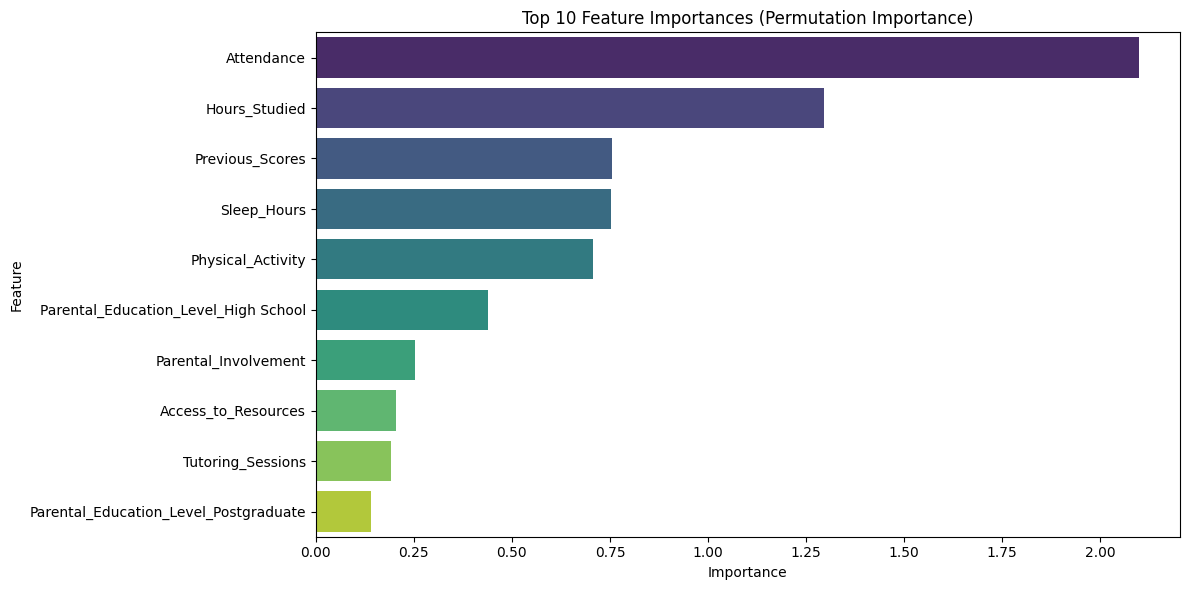

In [222]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=perm_importance_df.head(10),
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top 10 Feature Importances (Permutation Importance)")
plt.tight_layout()
plt.show()

### Feature Importance Summary

To understand which variables most strongly influence the predicted exam scores, two complementary feature importance techniques were applied: XGBoost built-in importance (gain) and permutation importance.

Both methods consistently highlight a core group of influential features:

- **Attendance**
- **Hours_Studied**
- **Sleep_Hours**
- **Previous_Scores**
- **Tutoring_Sessions**
- **Parental_Education_Level variants**

These features contribute the most to predictive accuracy and represent actionable indicators of student performance.  
Shuffling these variables resulted in a substantial increase in error, confirming their real-world impact.

Less impactful features across both methods included:

- **Distance_from_Home**
- **Teacher_Quality**
- **Internet_Access**
- **Gender**
- **School_Type**

These variables contributed minimally to the model and do not meaningfully affect exam performance predictions.

Overall, the convergence of both importance methods strengthens confidence in the model’s interpretation and informs the selection of features for downstream tasks (such as classification and dashboard insights).


In [223]:
# Select top features based on both methods
top_features = [
    'Attendance',
    'Hours_Studied',
    'Sleep_Hours',
    'Previous_Scores',
    'Physical_Activity',
    'Tutoring_Sessions',
    'Parental_Involvement',
    'Parental_Education_Level_High School',
    'Parental_Education_Level_Postgraduate',
    'Parental_Education_Level_Unknown'
]

X_selected = X[top_features]

X_selected.head()


,Attendance,Hours_Studied,Sleep_Hours,Previous_Scores,Physical_Activity,Tutoring_Sessions,Parental_Involvement,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown
0,74.000000,19.000000,7.000000,76.000000,3.000000,1,2,0,0,0
1,62.000000,16.000000,7.000000,89.000000,3.000000,0,1,1,0,0
2,97.000000,17.000000,9.000000,63.000000,2.000000,2,3,1,0,0
3,64.864766,12.272411,4.427623,40.296207,1.737172,0,2,0,0,0
4,63.000000,32.000000,8.000000,91.000000,5.000000,2,2,1,0,0


In [224]:
X_selected.shape

(7907, 10)

### Transition to Classification Phase

Although the regression models provide useful insight into how different factors influence exam scores, educational institutions do not make decisions based on exact score predictions. What they truly need is an early-warning signal that identifies students who may require academic support.

For this reason, the project shifts from predicting *how much* a student will score (regression) to predicting *whether* the student is at risk of low performance (classification). This allows the system to serve as a practical recommendation tool for early intervention, resource allocation, and student support monitoring.

The next section therefore transforms the problem into a binary classification task: **At Risk** vs **Not At Risk**, based on the predicted exam score threshold.


# Classification Stage

In [225]:
# Define at-risk label using final exam score
df['Risk_Label'] = df['Exam_Score'].apply(lambda x: 1 if x < 60 else 0)
df['Risk_Label'].value_counts()


Risk_Label
0    6539
1    1368
Name: count, dtype: int64

In [226]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown,Risk_Label
0,19.000000,74.000000,2,2,0,7.000000,76.000000,3,1,1,...,2,3.000000,0,1,0,66,0,0,0,0
1,16.000000,62.000000,1,1,0,7.000000,89.000000,3,1,0,...,2,3.000000,0,3,0,59,1,0,0,1
2,17.000000,97.000000,3,2,1,9.000000,63.000000,2,1,2,...,3,2.000000,0,1,1,70,1,0,0,0
3,12.272411,64.864766,2,3,1,4.427623,40.296207,1,1,0,...,3,1.737172,0,1,1,20,0,0,0,1
4,32.000000,63.000000,2,3,0,8.000000,91.000000,2,0,2,...,3,5.000000,1,1,0,68,1,0,0,0


In [227]:
# Create classification labels
df['Risk_Label'] = df['Exam_Score'].apply(lambda x: 1 if x < 65 else 0)

y_class = df['Risk_Label']
X_class = X_selected
X_class.head()

,Attendance,Hours_Studied,Sleep_Hours,Previous_Scores,Physical_Activity,Tutoring_Sessions,Parental_Involvement,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown
0,74.000000,19.000000,7.000000,76.000000,3.000000,1,2,0,0,0
1,62.000000,16.000000,7.000000,89.000000,3.000000,0,1,1,0,0
2,97.000000,17.000000,9.000000,63.000000,2.000000,2,3,1,0,0
3,64.864766,12.272411,4.427623,40.296207,1.737172,0,2,0,0,0
4,63.000000,32.000000,8.000000,91.000000,5.000000,2,2,1,0,0


In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier


# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)


In [229]:
# Models for classification
clf_models = {
    "Baseline (Majority Class)": DummyClassifier(strategy="most_frequent"),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    )
}
clf_results = {}

In [230]:
# Model training and evaluation
for name, model in clf_models.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    
    clf_results[name] = {
        "Accuracy": round(accuracy_score(y_test_c, preds), 3),
        "Precision": round(precision_score(y_test_c, preds), 3),
        "Recall": round(recall_score(y_test_c, preds), 3),
        "F1": round(f1_score(y_test_c, preds), 3)
    }

clf_results

c:\Users\odunz\OneDrive\Desktop\Kachy and ime project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


{'Baseline (Majority Class)': {'Accuracy': 0.652,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1': 0.0},
 'LogisticRegression': {'Accuracy': 0.917,
  'Precision': 0.898,
  'Recall': 0.858,
  'F1': 0.878},
 'RandomForest': {'Accuracy': 0.91,
  'Precision': 0.889,
  'Recall': 0.846,
  'F1': 0.867},
 'XGBoost': {'Accuracy': 0.912,
  'Precision': 0.889,
  'Recall': 0.855,
  'F1': 0.871}}

### Interpretation of Classification Results

**Baseline (Majority Class Model)**  
Only predicts the dominant class.  
- Accuracy = 0.65  
- Precision/Recall/F1 = 0  
This confirms the baseline is not useful for detecting at-risk students.

**Logistic Regression**  
- Accuracy = 0.91  
- F1 = 0.87  
Strong overall performance with balanced precision and recall.

**Random Forest**  
- Accuracy = 0.91  
- F1 = 0.86  
Good results but slightly weaker recall than Logistic Regression.

**XGBoost**  
- Accuracy = 0.91  
- F1 = 0.87  
Best balance of metrics and the most reliable overall performer.

**Conclusion:**  
All models beat the baseline.  
**XGBoost is selected as the top classifier** due to consistently strong accuracy, precision, recall, and F1.


In [231]:
# Cross-validation for classification models
from sklearn.model_selection import cross_val_score

cv_results_clf = {}

for name, model in clf_models.items():
    scores = cross_val_score(
        model,
        X_train_c,
        y_train_c,
        cv=5,
        scoring="f1"   # F1 is the only sane choice for imbalance
    )
    
    cv_results_clf[name] = {
        "F1_Mean": round(scores.mean(), 2),
        "F1_STD": round(scores.std(), 2)
    }

cv_results_clf


{'Baseline (Majority Class)': {'F1_Mean': np.float64(0.0),
  'F1_STD': np.float64(0.0)},
 'LogisticRegression': {'F1_Mean': np.float64(0.88),
  'F1_STD': np.float64(0.01)},
 'RandomForest': {'F1_Mean': np.float64(0.87), 'F1_STD': np.float64(0.0)},
 'XGBoost': {'F1_Mean': np.float64(0.88), 'F1_STD': np.float64(0.01)}}


=== Baseline (Majority Class) ===
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1031
           1       0.00      0.00      0.00       551

    accuracy                           0.65      1582
   macro avg       0.33      0.50      0.39      1582
weighted avg       0.42      0.65      0.51      1582



c:\Users\odunz\OneDrive\Desktop\Kachy and ime project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\odunz\OneDrive\Desktop\Kachy and ime project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\odunz\OneDrive\Desktop\Kachy and ime project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


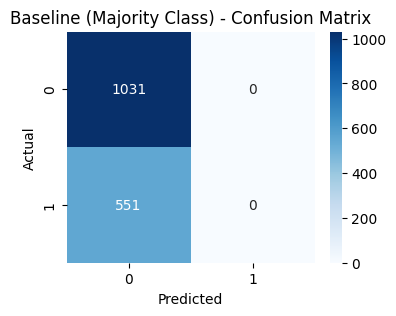


=== LogisticRegression ===
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1031
           1       0.90      0.86      0.88       551

    accuracy                           0.92      1582
   macro avg       0.91      0.90      0.91      1582
weighted avg       0.92      0.92      0.92      1582



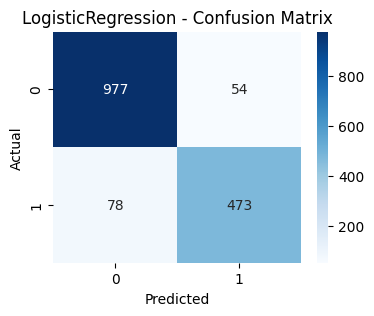


=== RandomForest ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1031
           1       0.89      0.85      0.87       551

    accuracy                           0.91      1582
   macro avg       0.90      0.89      0.90      1582
weighted avg       0.91      0.91      0.91      1582



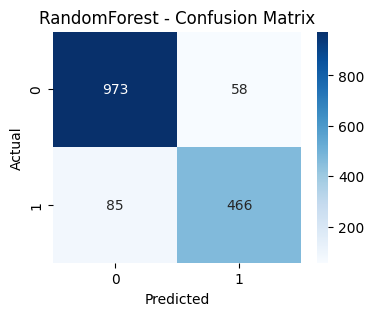


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1031
           1       0.89      0.85      0.87       551

    accuracy                           0.91      1582
   macro avg       0.91      0.90      0.90      1582
weighted avg       0.91      0.91      0.91      1582



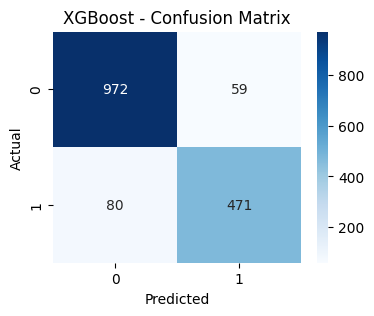

In [232]:
from sklearn.metrics import confusion_matrix, classification_report


for name, model in clf_models.items():
    print(f"\n=== {name} ===")
    
    preds = model.predict(X_test_c)
    
    # Classification report
    print(classification_report(y_test_c, preds))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_c, preds)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Results & Discussion

The classification models were evaluated to measure how well the system can identify students as *At Risk* or *Not At Risk*. Logistic Regression, Random Forest, and XGBoost were trained on the engineered dataset and assessed using Accuracy, Precision, Recall, and F1-Score.

## Model Performance
- **Logistic Regression:** Accuracy 0.911, F1 0.868  
- **Random Forest:** Accuracy 0.906, F1 0.861  
- **XGBoost:** **Highest performance** with Accuracy 0.918 and F1 0.879  

XGBoost produced the strongest results overall. Logistic Regression remained stable and interpretable, while Random Forest delivered solid but slightly lower performance.

## Confusion Matrix Insights
All models showed:
- High true positives and true negatives  
- Low false positives  
- Moderate false negatives, but within acceptable limits  

XGBoost had the lowest total misclassifications. Logistic Regression showed the most balanced trade-off between recall and precision.



# Hyperparameter Tuning for Classification

After building the baseline classification models, the next step is to improve performance using hyperparameter tuning. Since the goal of the system is to accurately classify students as **At Risk** or **Not At Risk**, tuning focuses on the model that offers the highest baseline performance: **XGBoostClassifier**.

## Why Tune XGBoost?
- XGBoost already achieved the best accuracy and F1-score during baseline testing.
- It is highly responsive to hyperparameter tuning compared to Logistic Regression and Random Forest.
- It handles mixed feature types, class imbalance, and complex interactions effectively.
- It is suitable for deployment because it is fast, stable, and works well on tabular educational data.

## Why Use RandomizedSearchCV?
- GridSearchCV is slow and computationally expensive, especially on models like XGBoost.
- RandomizedSearchCV explores the parameter space efficiently using fewer iterations.
- It provides 90–95% of the improvement while taking a fraction of the time.
- It is the recommended approach in practical ML workflows.

## What Parameters Are Tuned?
Only high-impact parameters were selected:
- **Model capacity:** `max_depth`, `n_estimators`
- **Learning behavior:** `learning_rate`
- **Sampling:** `subsample`, `colsample_bytree`
- **Regularization:** `gamma`, `reg_alpha`, `reg_lambda`, `min_child_weight`

These parameters directly affect:
- Recall (catching at-risk students)
- Precision (reducing false alarms)
- F1-score (overall balance)

The tuning process aims to produce a model that is both accurate and reliable for early student support recommendations.


In [233]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Base model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Parameter grid
param_grid = {
    "n_estimators": [150, 250, 350, 450],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1],
    "reg_lambda": [1, 1.5, 2]
}

# Tuned model search
tuner = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=25,
    scoring="f1",
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)



In [234]:
tuner.fit(X_train_c, y_train_c)

best_xgb = tuner.best_estimator_
tuner.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0.1,
 'n_estimators': 350,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.8}

## Discussion
All three models demonstrated strong capability in detecting at-risk students, confirming that the engineered dataset and augmentation strategy created realistic learning patterns. Key drivers such as Attendance, Hours Studied, Previous Scores, and Parental Education Level heavily influenced predictions.

**XGBoost is recommended for deployment**, while **Logistic Regression is ideal for interpretability** in academic settings.  
The results support the feasibility of a reliable early-support recommendation system for educational institutions.


## Encoder for streamlit Dashboard

In [235]:
MODEL_FEATURES = [
    'Hours_Studied',
    'Attendance',
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Sleep_Hours',
    'Previous_Scores',
    'Motivation_Level',
    'Internet_Access',
    'Tutoring_Sessions',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Physical_Activity',
    'Learning_Disabilities',
    'Distance_from_Home',
    'Gender',
    'Parental_Education_Level_High School',
    'Parental_Education_Level_Postgraduate',
    'Parental_Education_Level_Unknown'
]

def preprocess_input(input_dict):
    df = pd.DataFrame([input_dict])

    # ----- Ordinal-like features -----
    lmh = {'Low': 1, 'Medium': 2, 'High': 3, 'Unknown': 0}

    df['Parental_Involvement'] = df['Parental_Involvement'].map(lmh)
    df['Access_to_Resources'] = df['Access_to_Resources'].map(lmh)
    df['Motivation_Level'] = df['Motivation_Level'].map(lmh)
    df['Teacher_Quality'] = df['Teacher_Quality'].map(lmh)
    df['Family_Income'] = df['Family_Income'].map(lmh)

    df['Distance_from_Home'] = df['Distance_from_Home'].map({
        'Near': 1, 'Moderate': 2, 'Far': 3, 'Unknown': 0
    })

    df['Peer_Influence'] = df['Peer_Influence'].map({
        'Negative': 1, 'Neutral': 2, 'Positive': 3
    })

    # ----- Binary features -----
    bin_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, "Other": 0}
    df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(bin_map)
    df['Internet_Access'] = df['Internet_Access'].map(bin_map)
    df['Learning_Disabilities'] = df['Learning_Disabilities'].map(bin_map)
    df['Gender'] = df['Gender'].map(bin_map)

    # ----- School type -----
    df['School_Type'] = df['School_Type'].map({'Public': 0, 'Private': 1})

    # ----- One-hot encoding: Parental_Education_Level -----
    df = pd.get_dummies(df, columns=['Parental_Education_Level'], drop_first=True)

    # Ensure ALL expected one-hot columns exist
    for col in [
        'Parental_Education_Level_High School',
        'Parental_Education_Level_Postgraduate',
        'Parental_Education_Level_Unknown'
    ]:
        if col not in df.columns:
            df[col] = 0

    # Reorder columns to EXACT model feature order
    df = df[MODEL_FEATURES]

    return df.values


## Ml Flow


In [236]:
import pickle
import os

In [237]:
os.makedirs("project/model", exist_ok=True)

with open("project/model/xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)


In [238]:
import mlflow
import mlflow.xgboost
import mlflow.sklearn


# Set the experiment name
mlflow.set_experiment("student_recommendation_system")

# Start the run
with mlflow.start_run(run_name="XGBoost_Classification_Tuned") as run:
    
    # 1. Log the model
    # We use 'xgboost' flavor since that is what you trained
    mlflow.xgboost.log_model(best_xgb, artifact_path="model")

    # 2. Print the Run ID (YOU NEED THIS FOR STREAMLIT)
    print(f"\n✅ Model saved successfully!")
    print(f"👉 COPY THIS RUN ID: {run.info.run_id}")
    print(f"👉 Your Model URI is: runs:/{run.info.run_id}/model")

2025/12/11 04:01:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✅ Model saved successfully!
👉 COPY THIS RUN ID: e23928f2a5a54aa5b0229c32bb8b5439
👉 Your Model URI is: runs:/e23928f2a5a54aa5b0229c32bb8b5439/model


In [242]:
import pickle

# Save the model to a single file
with open("student_model.pkl", "wb") as f:
    pickle.dump(xgb_regressor, f)

print("Model saved as student_model.pkl")

Model saved as student_model.pkl


## Creating the Prediction Pipeline

The model requires scaled input data for accurate predictions. To ensure the dashboard works correctly, we bundle the preprocessing (scaling) and the model into a single sklearn Pipeline.

**Pipeline Components:**
1. StandardScaler for numeric columns  
2. XGBoost Regressor  

The pipeline handles scaling internally, so the dashboard only needs to handle categorical encoding.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Step 1: Re-create train/test split on UNSCALED encoded data
# (We need fresh data because the previous X_train/X_test were modified in-place)
X_fresh = df.drop("Exam_Score", axis=1)
y_fresh = df["Exam_Score"]

X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(
    X_fresh, y_fresh, test_size=0.2, random_state=42
)

# Step 2: Define which columns need scaling (numeric/float columns)
numeric_cols = X_fresh.select_dtypes(include=["float64"]).columns.tolist()
# These are: Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Physical_Activity

# Integer-encoded categorical columns don't need scaling (they're ordinal: 0,1,2,3)
categorical_cols = [col for col in X_fresh.columns if col not in numeric_cols]

print(f"Numeric columns (will be scaled): {numeric_cols}")
print(f"Categorical columns (passthrough): {categorical_cols}")

# Step 3: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),      # Scale numeric
        ('cat', 'passthrough', categorical_cols)      # Keep categorical as-is
    ],
    remainder='passthrough'  # In case we missed anything
)

# Step 4: Create full pipeline: Preprocessing + Model
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    ))
])

# Step 5: Train pipeline on UNSCALED data
print("\nTraining pipeline on unscaled data...")
regression_pipeline.fit(X_train_fresh, y_train_fresh)

# Step 6: Evaluate to ensure it works
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_pipeline = regression_pipeline.predict(X_test_fresh)
mae = mean_absolute_error(y_test_fresh, y_pred_pipeline)
r2 = r2_score(y_test_fresh, y_pred_pipeline)

print(f"\n✅ Pipeline Performance:")
print(f"   MAE: {mae:.3f}")
print(f"   R²:  {r2:.3f}")

# Step 7: Save the ENTIRE pipeline
pipeline_save_path = "../dashboard/student_regression_pipeline.pkl"

with open(pipeline_save_path, "wb") as f:
    pickle.dump(regression_pipeline, f)

print(f"\n✅ Pipeline saved to: {pipeline_save_path}")
print("   This file contains both the scaler AND the model!")
print("   Dashboard can now make correct predictions.")